In [135]:
import pandas as pd
import yfinance as yf
import numpy as np

start_date = '2012-07-8'
end_date = '2022-07-15'

stocks = ['SPY', 'DIA', 'QQQ', 'AMZN', 'GOOG', 'AAPL']
dates = pd.date_range(start_date, end_date)
data = pd.DataFrame(index=dates)

In [146]:
for i in stocks:
    data[i] = yf.download(tickers = i, start = start_date, end = end_date, interval = '1d')[['Close']]
#print data 
data.dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SPY,DIA,QQQ,AMZN,GOOG,AAPL
2012-07-09,135.320007,127.239998,64.000000,11.252500,291.910858,21.924643
2012-07-10,134.139999,126.349998,63.369999,10.975000,289.763885,21.721786
2012-07-11,134.160004,125.910004,63.020000,10.918500,284.528503,21.586786
2012-07-12,133.509995,125.570000,62.430000,10.768000,284.174835,21.389286
2012-07-13,135.750000,127.620003,63.380001,10.919500,287.183563,21.606071
...,...,...,...,...,...,...
2022-07-08,388.670013,313.459991,295.350006,115.540001,2403.370117,147.039993
2022-07-11,384.230011,311.700012,289.040009,111.750000,2330.449951,144.869995
2022-07-12,380.829987,309.970001,286.239990,109.220001,2296.989990,145.860001
2022-07-13,378.829987,307.750000,285.649994,110.400002,2243.739990,145.490005


In [159]:
returns = data.dropna()

for i in stocks:
    returns[i] = (returns[i]-returns[i].shift(1))/returns[i].shift(1)

# gets returns as a percentage
returns

<ipython-input-159-6187bb9f11e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns[i] = (returns[i]-returns[i].shift(1))/returns[i].shift(1)


,SPY,DIA,QQQ,AMZN,GOOG,AAPL
2012-07-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-10,-0.008720,-0.006995,-0.009844,-0.024661,-0.007355,-0.009252
2012-07-11,0.000149,-0.003482,-0.005523,-0.005148,-0.018068,-0.006215
2012-07-12,-0.004845,-0.002700,-0.009362,-0.013784,-0.001243,-0.009149
2012-07-13,0.016778,0.016326,0.015217,0.014070,0.010588,0.010135
...,...,...,...,...,...,...
2022-07-08,-0.000823,-0.001561,0.001254,-0.006791,0.007229,0.004715
2022-07-11,-0.011424,-0.005615,-0.021364,-0.032803,-0.030341,-0.014758
2022-07-12,-0.008849,-0.005550,-0.009687,-0.022640,-0.014358,0.006834
2022-07-13,-0.005252,-0.007162,-0.002061,0.010804,-0.023183,-0.002537


In [156]:
# covariance matrix / diagonal is simply variance of asset, rest is covariance
cov = returns.cov()
cov

,SPY,DIA,QQQ,AMZN,GOOG,AAPL
SPY,1.130905,1.098448,1.256843,1.243250,1.247144,1.324474
DIA,1.098448,1.147476,1.142173,1.047002,1.123758,1.213082
QQQ,1.256843,1.142173,1.639322,1.819423,1.653917,1.804671
AMZN,1.243250,1.047002,1.819423,3.937288,1.993216,1.732583
GOOG,1.247144,1.123758,1.653917,1.993216,2.705152,1.618523
AAPL,1.324474,1.213082,1.804671,1.732583,1.618523,3.275539


<AxesSubplot:title={'center':'Covariances of Selected Stocks'}>

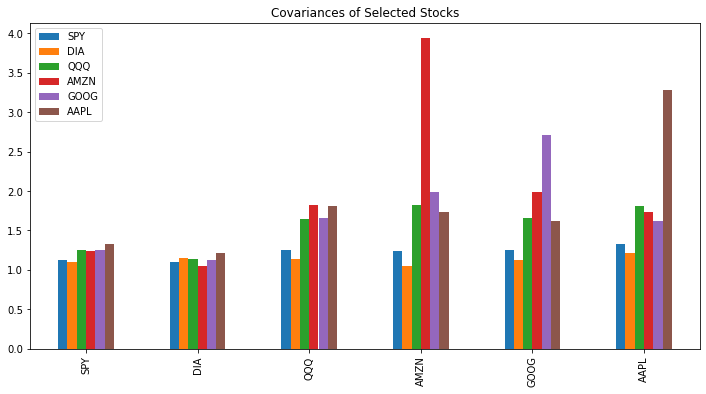

In [157]:
cov.plot.bar(title="Covariances of Selected Stocks", figsize = (12,6))